# Problem Statement

The project aims to predict whether an individual may undergo depression based on various factors such as demographic information, lifestyle choices, and medical history. By leveraging deep learning, the model will be able to identify patterns in the data that could indicate a higher likelihood of depression. The solution must address the complexities of healthcare data, including biases, and provide equitable predictions for people from diverse backgrounds.

## Data Extraction

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
depress = pd.read_csv('train.csv')

## Understanding the Data

In [2]:
depress.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [3]:
depress.shape

(140700, 20)

In [4]:
depress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [5]:
depress.duplicated().sum()

0

In [6]:
depress.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [7]:
# Percentage of null values 
perc_null = [round((x/len(depress))*100,4) for x in depress.isnull().sum()]
perc_col = depress.columns.to_list()
df_perc = pd.DataFrame({'Columns':perc_col,'Percentage':perc_null})
df_perc

,Columns,Percentage
0,id,0.0000
1,Name,0.0000
2,Gender,0.0000
3,Age,0.0000
4,City,0.0000
5,Working Professional or Student,0.0000
6,Profession,26.0341
7,Academic Pressure,80.1727
8,Work Pressure,19.8422
9,CGPA,80.1720


In [8]:
depress.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [9]:
# Drop off columns with higher percentage of null values
depress.drop(['Academic Pressure','CGPA','Study Satisfaction'],axis=1,inplace=True)

In [10]:
# Drop of unique identifiers
depress.drop(['id','Name'],axis=1,inplace=True)

In [11]:
depress.isna().sum()

Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36630
Work Pressure                            27918
Job Satisfaction                         27910
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [12]:
# Drop of the null values, if their percentage is < 1% in the columns
depress.dropna(subset=['Dietary Habits','Degree','Financial Stress'],inplace=True)

In [13]:
depress.isna().sum()

Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36622
Work Pressure                            27913
Job Satisfaction                         27905
Sleep Duration                               0
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [14]:
for x in depress.select_dtypes(include='object').columns:
    print(x)
    print(depress[x].unique())

Gender
['Female' 'Male']
City
['Ludhiana' 'Varanasi' 'Visakhapatnam' 'Mumbai' 'Kanpur' 'Ahmedabad'
 'Thane' 'Nashik' 'Bangalore' 'Patna' 'Rajkot' 'Jaipur' 'Pune' 'Lucknow'
 'Meerut' 'Agra' 'Surat' 'Faridabad' 'Hyderabad' 'Srinagar' 'Ghaziabad'
 'Kolkata' 'Chennai' 'Kalyan' 'Nagpur' 'Vadodara' 'Vasai-Virar' 'Delhi'
 'Bhopal' 'Indore' 'Ishanabad' 'Vidhi' 'Ayush' 'Gurgaon' 'Krishna'
 'Aishwarya' 'Keshav' 'Harsha' 'Nalini' 'Aditya' 'Malyansh' 'Raghavendra'
 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'Nandini' 'M.Com' 'Plata'
 'Atharv' 'Pratyush' 'City' '3.0' 'Less than 5 Kalyan' 'MCA' 'Mira'
 'Moreadhyay' 'Morena' 'Ishkarsh' 'Kashk' 'Mihir' 'Vidya' 'Tolkata' 'Anvi'
 'Krinda' 'Ayansh' 'Shrey' 'Ivaan' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kashish' 'Kibara' 'Vaishnavi' 'Chhavi' 'Parth' 'Mahi' 'Tushar' 'MSc'
 'No' 'Rashi' 'ME' 'Molkata' 'Researcher' 'Kagan' 'Armaan' 'Ithal'
 'Nalyan' 'Dhruv' 'Galesabad' 'Itheg' 'Aaradhya' 'Pooja' 'Khushi'
 'Khaziabad' 'Jhanvi' 'Unirar']
Working Professional or St

In [15]:
depress.duplicated().sum()

72

## Data Preprocessing

In [16]:
# Valid City Names
import numpy as np
valid_cities = [
    'Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur', 'Ahmedabad',
    'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot', 'Jaipur', 'Pune',
    'Lucknow', 'Meerut', 'Agra', 'Surat', 'Faridabad', 'Hyderabad',
    'Srinagar', 'Ghaziabad', 'Kolkata', 'Chennai', 'Kalyan', 'Nagpur',
    'Vadodara', 'Vasai-Virar', 'Delhi', 'Bhopal', 'Indore', 'Gurgaon',
    'Morena'
]
city_correc = {
    'Tolkata':'Kolkata',
    'Molkata':'Kolkata',
    'Khaziabad':'Ghaziabad'
}
depress['City'].replace(city_correc,inplace=True)
depress['City'] = depress['City'].apply(lambda x: x if x in valid_cities else np.nan)

In [17]:
# Valid Professions
valid_professions = [
    'Chef', 'Teacher', 'Business Analyst', 'Financial Analyst', 'Chemist',
    'Electrician', 'Software Engineer', 'Data Scientist', 'Plumber',
    'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
    'UX/UI Designer', 'Content Writer', 'Educational Consultant',
    'Civil Engineer', 'Manager', 'Pharmacist', 'Architect',
    'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
    'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
    'Digital Marketer', 'Lawyer', 'Research Analyst', 'Sales Executive',
    'Doctor', 'Unemployed', 'Investment Banker', 'Family Consultant',
    'City Manager', 'Academic', 'Analyst','Student'
]
prof_map = {
    'Medical Doctor':'Doctor',
    'Finanancial Analyst':'Financial Analyst'
}
depress['Profession'].replace(prof_map,inplace=True)
depress['Profession'] = depress['Profession'].apply(lambda x: x if x in valid_professions else np.nan)

In [18]:
depress.isna().sum()

Gender                                       0
Age                                          0
City                                        92
Working Professional or Student              0
Profession                               36653
Work Pressure                            27913
Job Satisfaction                         27905
Sleep Duration                               0
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [19]:
depress['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [20]:
def modfy_sleep_duration(dur):
    if dur in ['Less than 5 hours','1-2 hours','2-3 hours','3-4 hours','1-3 hours']:
        return 'Less than 5 hours'
    elif dur in ['5-6 hours','7-8 hours','6-8 hours','4-6 hours','6-7 hours','4-5 hours',
                  '1-6 hours','8 hours','3-6 hours']:
        return '5-8 hours'
    elif dur in ['More than 8 hours','10-11 hours','8-9 hours','40-45 hours','9-11 hours','55-66 hours',
                  '9-6 hours','35-36 hours','10-6 hours','49 hours','45-48 hours','9-5','9-5 hours']:
        return 'More than 8 hours'
    else:
        return np.nan
depress['Sleep Duration'] = depress['Sleep Duration'].apply(modfy_sleep_duration)

In [21]:
depress['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-8 hours', nan],
      dtype=object)

In [22]:
depress.isna().sum()

Gender                                       0
Age                                          0
City                                        92
Working Professional or Student              0
Profession                               36653
Work Pressure                            27913
Job Satisfaction                         27905
Sleep Duration                              15
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [23]:
depress['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', 'No Healthy', 'Less Healthy', 'M.Tech',
       'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'], dtype=object)

In [24]:
valid_diethab = ['Healthy','Moderate','Unhealthy']
diet_map = {
    'Less than Healthy':'Unhealthy',
    'No Healthy':'Unhealthy',
    'Less Healthy':'Unhealthy',
    'More Healthy':'Healthy'
}
depress['Dietary Habits'].replace(diet_map,inplace=True)
depress['Dietary Habits'] = depress['Dietary Habits'].apply(lambda x: x if x in valid_diethab else np.nan)

In [25]:
depress['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', nan], dtype=object)

In [26]:
depress.isna().sum()

Gender                                       0
Age                                          0
City                                        92
Working Professional or Student              0
Profession                               36653
Work Pressure                            27913
Job Satisfaction                         27905
Sleep Duration                              15
Dietary Habits                              18
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [27]:
# Degree
# Your clean degree mapping
degree_mapping = {
    # Bachelor's Degrees
    'B.Tech': 'Bachelors', 'BE': 'Bachelors', 'BSc': 'Bachelors', 'B.Sc': 'Bachelors',
    'BA': 'Bachelors', 'BBA': 'Bachelors', 'BCA': 'Bachelors', 'B.Com': 'Bachelors',
    'B.Ed': 'Bachelors', 'BEd': 'Bachelors', 'B.Pharm': 'Bachelors', 'BPharm': 'Bachelors',
    'BArch': 'Bachelors', 'B.Arch': 'Bachelors', 'LLB': 'Bachelors', 'BHM': 'Bachelors',
    'BH': 'Bachelors', 'BPA': 'Bachelors', 'B.Student': 'Bachelors', 'B BA': 'Bachelors',
    'B B.Com': 'Bachelors',

    # Master's Degrees
    'M.Tech': 'Masters', 'ME': 'Masters', 'MA': 'Masters', 'MBA': 'Masters',
    'MCA': 'Masters', 'M.Com': 'Masters', 'M.Ed': 'Masters', 'MEd': 'Masters',
    'MSc': 'Masters', 'MS': 'Masters', 'M.S': 'Masters', 'MTech': 'Masters',
    'M_Tech': 'Masters', 'MD': 'Masters', 'MPA': 'Masters', 'MHM': 'Masters',
    'MPharm': 'Masters', 'M.Pharm': 'Masters', 'M.Arch': 'Masters', 'LLM': 'Masters',

    # Doctorate
    'PhD': 'Doctorate', 'Doctor': 'Doctorate',
}

# Apply mapping, invalids become NaN
depress['Degree'] = depress['Degree'].map(degree_mapping).fillna(np.nan)

In [28]:
depress.Degree.unique()

array(['Bachelors', 'Masters', nan, 'Doctorate'], dtype=object)

In [29]:
depress.isna().sum()

Gender                                       0
Age                                          0
City                                        92
Working Professional or Student              0
Profession                               36653
Work Pressure                            27913
Job Satisfaction                         27905
Sleep Duration                              15
Dietary Habits                              18
Degree                                   17896
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [30]:
depress.dropna(subset=['City','Sleep Duration','Dietary Habits'],inplace=True)

In [31]:
depress[depress['Working Professional or Student']=='Student']

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-8 hours,Healthy,Bachelors,Yes,3.0,1.0,No,1
8,Female,24.0,Bangalore,Student,NaN,NaN,NaN,5-8 hours,Moderate,Bachelors,No,3.0,2.0,Yes,0
26,Male,31.0,Srinagar,Student,NaN,NaN,NaN,Less than 5 hours,Healthy,Bachelors,No,9.0,1.0,Yes,0
30,Female,28.0,Varanasi,Student,NaN,NaN,NaN,5-8 hours,Moderate,Bachelors,Yes,4.0,5.0,Yes,1
32,Female,25.0,Jaipur,Student,NaN,NaN,NaN,5-8 hours,Moderate,Masters,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,Female,27.0,Surat,Student,NaN,NaN,NaN,5-8 hours,Unhealthy,NaN,Yes,7.0,1.0,Yes,0
140686,Male,27.0,Ludhiana,Student,NaN,NaN,NaN,Less than 5 hours,Healthy,Masters,No,0.0,3.0,Yes,0
140689,Male,31.0,Faridabad,Student,NaN,NaN,NaN,5-8 hours,Unhealthy,Masters,No,12.0,2.0,No,0
140690,Female,18.0,Ludhiana,Student,NaN,NaN,NaN,Less than 5 hours,Healthy,NaN,Yes,10.0,5.0,No,1


In [32]:
stud_idx = depress[depress['Working Professional or Student']=='Student'].index.to_list()
depress.loc[stud_idx,'Profession'] = depress.loc[stud_idx,'Profession'].fillna('Student')
depress.loc[stud_idx,'Work Pressure'] = depress.loc[stud_idx,'Work Pressure'].fillna(0)
depress.loc[stud_idx,'Job Satisfaction'] = depress.loc[stud_idx,'Job Satisfaction'].fillna(0)

In [33]:
depress.isna().sum()

Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                8789
Work Pressure                               20
Job Satisfaction                            17
Sleep Duration                               0
Dietary Habits                               0
Degree                                   17885
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [34]:
depress.shape

(140565, 15)

In [35]:
depress.dropna(subset=['Work Pressure','Job Satisfaction'],inplace=True)

In [36]:
depress.reset_index(drop=True,inplace=True)

In [37]:
deg = depress[['Profession','Degree']][depress['Working Professional or Student']!='Student']

In [38]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
le_profession = LabelEncoder()
le_degree = LabelEncoder()

# Encode only non-null values while leaving NaNs as NaN
deg['Profession_encoded'] = deg['Profession'].apply(lambda x: le_profession.fit_transform([x])[0] if pd.notnull(x) else None)
deg['Degree_encoded'] = deg['Degree'].apply(lambda x: le_degree.fit_transform([x])[0] if pd.notnull(x) else None)

#  Apply KNN Imputer to impute the missing values
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the encoded columns and impute missing values
deg[['Profession_encoded', 'Degree_encoded']] = imputer.fit_transform(deg[['Profession_encoded', 'Degree_encoded']])

#  Decode the imputed numeric values back into categorical values
deg['Profession'] = le_profession.inverse_transform(deg['Profession_encoded'].astype(int))
deg['Degree'] = le_degree.inverse_transform(deg['Degree_encoded'].astype(int))

# Drop the encoded columns
deg.drop(columns=['Profession_encoded', 'Degree_encoded'], inplace=True)

In [39]:
deg_idx = deg.index.to_list()
depress.loc[deg_idx,'Profession'] = depress.loc[deg_idx,'Profession'].fillna(deg.loc[deg_idx,'Profession'])
depress.loc[deg_idx,'Degree'] = depress.loc[deg_idx,'Degree'].fillna(deg.loc[deg_idx,'Degree'])

In [40]:
depress.isna().sum()

Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                  0
Work Pressure                               0
Job Satisfaction                            0
Sleep Duration                              0
Dietary Habits                              0
Degree                                   6798
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

In [41]:
depress['Degree'].fillna(depress['Degree'].mode()[0],inplace=True)

In [42]:
depress.to_csv('Mental health data updated.csv',index=False)

## EDA

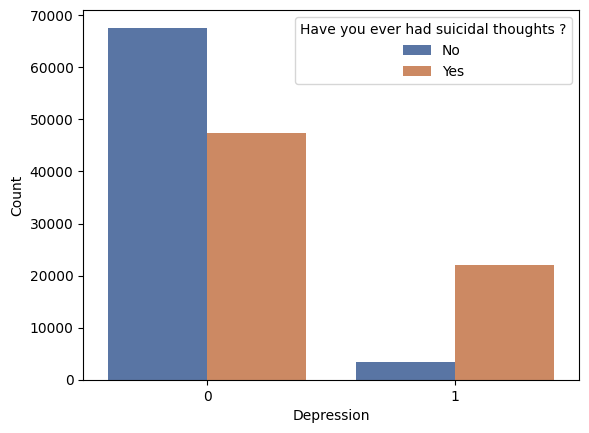

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
depression = depress.groupby(['Have you ever had suicidal thoughts ?',
                              'Depression']).agg(Count=('Depression','count'))
depression.reset_index(inplace=True)
sns.barplot(depression,x='Depression',y='Count',hue='Have you ever had suicidal thoughts ?',palette='deep')
plt.show()

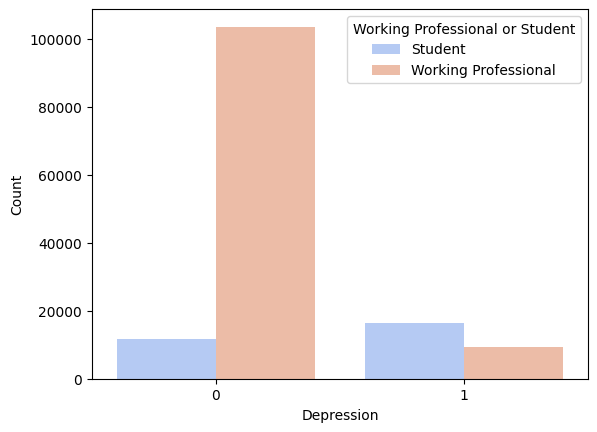

In [44]:
prof_or_stud = depress.groupby(['Working Professional or Student','Depression']).agg(Count=('Depression','count'))
prof_or_stud.reset_index(inplace=True)
sns.barplot(prof_or_stud,x='Depression',y='Count',hue='Working Professional or Student',palette='coolwarm')
plt.show()

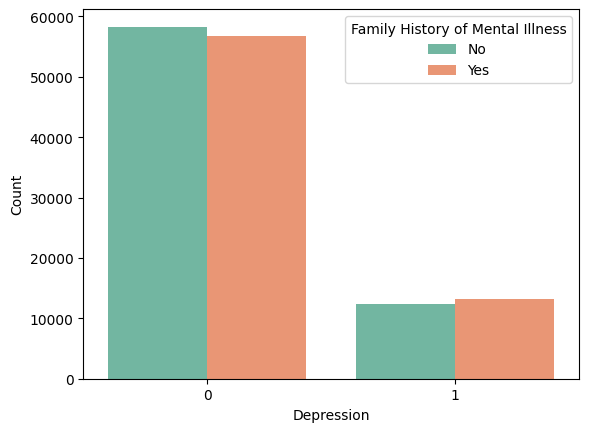

In [45]:
fly_mental = depress.groupby(['Family History of Mental Illness','Depression']).agg(Count=('Depression','count'))
fly_mental.reset_index(inplace=True)
sns.barplot(fly_mental,x='Depression',y='Count',hue='Family History of Mental Illness',palette='Set2')
plt.show()

## Feature Selection

In [46]:
depress_sel = depress.copy()
depress_sel['Depression'] = depress_sel['Depression'].replace({0:'No',1:'Yes'})

In [47]:
depress_sel

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,Bachelors,No,1.0,2.0,No,No
1,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,Bachelors,Yes,7.0,3.0,No,Yes
2,Male,33.0,Visakhapatnam,Student,Student,0.0,0.0,5-8 hours,Healthy,Bachelors,Yes,3.0,1.0,No,Yes
3,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,Bachelors,Yes,10.0,1.0,Yes,Yes
4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-8 hours,Unhealthy,Bachelors,Yes,9.0,4.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140535,Female,18.0,Ahmedabad,Working Professional,Plumber,5.0,4.0,5-8 hours,Unhealthy,Masters,No,2.0,4.0,Yes,Yes
140536,Female,41.0,Hyderabad,Working Professional,Content Writer,5.0,4.0,5-8 hours,Moderate,Bachelors,Yes,6.0,5.0,Yes,No
140537,Female,24.0,Kolkata,Working Professional,Marketing Manager,3.0,1.0,More than 8 hours,Moderate,Bachelors,No,4.0,4.0,No,No
140538,Female,49.0,Srinagar,Working Professional,Plumber,5.0,2.0,5-8 hours,Moderate,Masters,Yes,10.0,1.0,No,No


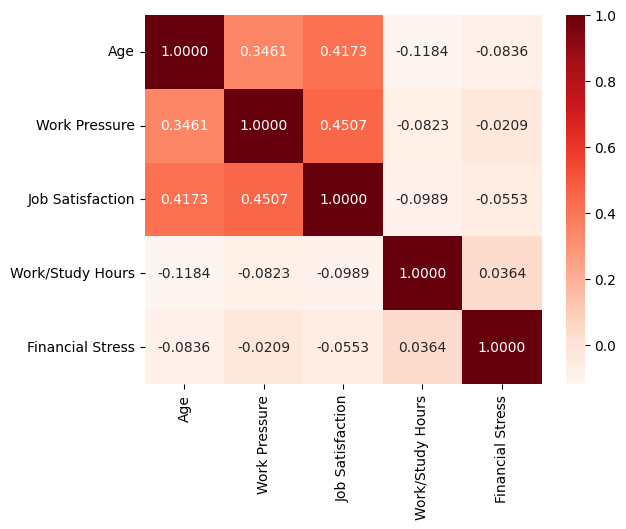

In [48]:
depress_sel_num = depress_sel.select_dtypes(include='number')
corr_mat = depress_sel_num.corr()
sns.heatmap(corr_mat,annot=True,fmt='.4f',cmap='Reds')
plt.show()

In [49]:
# ANOVA to compare numeric and categorical features
depress_sel_cat = depress_sel.select_dtypes(include='object')
from scipy.stats import f_oneway
for cat_var in depress_sel_cat.columns:
    for num_var in depress_sel_num.columns:
        # Group numerical data by the categorical variable
        groups = [group[num_var].values for _, group in depress_sel.groupby(cat_var)]
        
        # Perform ANOVA
        f_stat, p_value = f_oneway(*groups)
        
        print(f"ANOVA for {num_var} grouped by {cat_var}:")
        print(f"  F-Statistic: {f_stat}")
        print(f"  P-Value: {p_value}")
        print("  Significant?" + (" Yes" if p_value < 0.05 else " No"))
        print("-" * 40)

ANOVA for Age grouped by Gender:
  F-Statistic: 6.974326505510231
  P-Value: 0.008269647950564491
  Significant? Yes
----------------------------------------
ANOVA for Work Pressure grouped by Gender:
  F-Statistic: 3.9669419981275245
  P-Value: 0.04640390080368548
  Significant? Yes
----------------------------------------
ANOVA for Job Satisfaction grouped by Gender:
  F-Statistic: 13.246475151231616
  P-Value: 0.0002731907394111466
  Significant? Yes
----------------------------------------
ANOVA for Work/Study Hours grouped by Gender:
  F-Statistic: 6.69385192574267
  P-Value: 0.009675589161563239
  Significant? Yes
----------------------------------------
ANOVA for Financial Stress grouped by Gender:
  F-Statistic: 9.143334205163931
  P-Value: 0.0024967081604381786
  Significant? Yes
----------------------------------------
ANOVA for Age grouped by City:
  F-Statistic: 59.214413096496635
  P-Value: 0.0
  Significant? Yes
----------------------------------------
ANOVA for Work Pres

In [50]:
# Chi-squared test for all categorical variables
# Perform Chi-Squared Test for all pairs
from scipy.stats import chi2_contingency
for i in range(len(depress_sel_cat.columns)):
    for j in range(i + 1, len(depress_sel_cat.columns)):
        feature1 = depress_sel_cat.columns[i]
        feature2 = depress_sel_cat.columns[j]
        
        # Create contingency table
        contingency_table = pd.crosstab(depress_sel_cat[feature1],depress_sel_cat[feature2])
        
        # Perform Chi-Squared Test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Print results
        print(f"Chi-Squared Test between {feature1} and {feature2}:")
        print(f"Chi-Squared Statistic: {chi2:.2f}, P-Value: {p:.4f}, Degrees of Freedom: {dof}")
        print()

Chi-Squared Test between Gender and City:
Chi-Squared Statistic: 1315.53, P-Value: 0.0000, Degrees of Freedom: 31

Chi-Squared Test between Gender and Working Professional or Student:
Chi-Squared Statistic: 6.19, P-Value: 0.0129, Degrees of Freedom: 1

Chi-Squared Test between Gender and Profession:
Chi-Squared Statistic: 1042.95, P-Value: 0.0000, Degrees of Freedom: 39

Chi-Squared Test between Gender and Sleep Duration:
Chi-Squared Statistic: 1.08, P-Value: 0.5824, Degrees of Freedom: 2

Chi-Squared Test between Gender and Dietary Habits:
Chi-Squared Statistic: 208.48, P-Value: 0.0000, Degrees of Freedom: 2

Chi-Squared Test between Gender and Degree:
Chi-Squared Statistic: 32.08, P-Value: 0.0000, Degrees of Freedom: 2

Chi-Squared Test between Gender and Have you ever had suicidal thoughts ?:
Chi-Squared Statistic: 16.56, P-Value: 0.0000, Degrees of Freedom: 1

Chi-Squared Test between Gender and Family History of Mental Illness:
Chi-Squared Statistic: 33.83, P-Value: 0.0000, Degree

In [51]:
1/0

ZeroDivisionError: division by zero

## Scaling and Encoding of features

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
#depress_scaled = StandardScaler()

In [53]:
X = depress.drop('Depression',axis=1)
Y = depress['Depression']

In [55]:
X_num = X.select_dtypes(include='number')
X_ord = X[['Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']]
ord_mapping = {
    'Degree':['Bachelors','Masters','Doctorate'],
    'Have you ever had suicidal thoughts ?':['No','Yes'],
    'Family History of Mental Illness':['No','Yes']
}
ohe_col = [x for x in X.select_dtypes(include='object').columns if x not in X_ord]
X_ohe = X[ohe_col]

In [60]:
mental_preprocess = ColumnTransformer(transformers=[
    ('num',StandardScaler(),list(X_num)),
    ('ordinal',OrdinalEncoder(categories=[ord_mapping[col] for col in ord_mapping]),list(X_ord)),
    ('onehot',OneHotEncoder(sparse_output=False),list(X_ohe))
])

In [ ]:
#X_num = X.select_dtypes(include='number')
#X_num_sc = depress_scaled.fit_transform(X_num.values)
#X_num_sc = pd.DataFrame(X_num_sc,columns=X_num.columns)

In [ ]:
'''X_ord = X[['Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']]
ord_mapping = {
    'Degree':['Bachelors','Masters','Doctorate'],
    'Have you ever had suicidal thoughts ?':['No','Yes'],
    'Family History of Mental Illness':['No','Yes']
}
depress_ord = OrdinalEncoder(categories=[ord_mapping[col] for col in ord_mapping])
X_ord_enc = depress_ord.fit_transform(X_ord.values)
X_ord_enc = pd.DataFrame(X_ord_enc,columns=X_ord.columns)'''

In [ ]:
'''ohe_col = [x for x in X.select_dtypes(include='object').columns if x not in X_ord]
X_ohe = X[ohe_col]
depress_ohe = OneHotEncoder(sparse_output=False)
X_ohe_enc = depress_ohe.fit_transform(X_ohe)
X_ohe_enc = pd.DataFrame(X_ohe_enc,columns=depress_ohe.get_feature_names_out())'''

In [67]:
X_mdf = mental_preprocess.fit_transform(X)

In [69]:
X_mdf = pd.DataFrame(X_mdf,columns=mental_preprocess.get_feature_names_out())

## Model Development

In [62]:
!pip install torch

In [71]:
import torch
from torch import nn, optim
input_size = X_mdf.shape[1]
output_size = 1
class DeepMedical(nn.Module):
    def __init__(self,input_size,output_size):
        super(DeepMedical,self).__init__()
        self.fnn = nn.Sequential(
            nn.Linear(input_size,128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8,output_size),
            nn.Sigmoid())
        
    def forward(self,X):
        X = self.fnn(X)
        return X

## Model Training

In [73]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X_mdf,Y,test_size=0.2)
smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train,Y_train)

In [74]:
X_train_tens = torch.tensor(X_train_res.values,dtype=torch.float32)
X_test_tens = torch.tensor(X_test.values,dtype=torch.float32)
Y_train_tens = torch.tensor(Y_train_res.values,dtype=torch.float32).reshape(-1,1)
Y_test_tens = torch.tensor(Y_test.values,dtype=torch.float32).reshape(-1,1)

In [ ]:
#X_train_tens = torch.tensor(X_train.values,dtype=torch.float32)
#X_test_tens = torch.tensor(X_test.values,dtype=torch.float32)
#Y_train_tens = torch.tensor(Y_train.values,dtype=torch.float32).reshape(-1,1)
#Y_test_tens = torch.tensor(Y_test.values,dtype=torch.float32).reshape(-1,1)

In [75]:
model_med = DeepMedical(input_size,output_size)
#class_weights = torch.tensor([0.75, 1.25])
#criterion = nn.BCELoss(weight=class_weights[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model_med.parameters(),lr=0.01)
epochs = 2000
for epoch in range(1,epochs+1):
    model_med.train()
    optimizer.zero_grad()
    output = model_med(X_train_tens)
    target = Y_train_tens
    loss = criterion(output,target)
    loss.backward()
    optimizer.step()
    if epoch%100==0:
        print(f"Epoch {epoch} - Loss: {loss.item()}")

Epoch 100 - Loss: 0.19113902747631073
Epoch 200 - Loss: 0.16002750396728516
Epoch 300 - Loss: 0.14472727477550507
Epoch 400 - Loss: 0.1372583508491516
Epoch 500 - Loss: 0.132862389087677
Epoch 600 - Loss: 0.12964056432247162
Epoch 700 - Loss: 0.12835536897182465
Epoch 800 - Loss: 0.12590967118740082
Epoch 900 - Loss: 0.12451500445604324
Epoch 1000 - Loss: 0.12343142181634903
Epoch 1100 - Loss: 0.12322951853275299
Epoch 1200 - Loss: 0.1222832053899765
Epoch 1300 - Loss: 0.12131555378437042
Epoch 1400 - Loss: 0.12166740000247955
Epoch 1500 - Loss: 0.12033365666866302
Epoch 1600 - Loss: 0.12027756124734879
Epoch 1700 - Loss: 0.1193605586886406
Epoch 1800 - Loss: 0.11846422404050827
Epoch 1900 - Loss: 0.11925019323825836
Epoch 2000 - Loss: 0.11755403876304626


## Model Evaluation

In [76]:
from sklearn.metrics import classification_report
model_med.eval()
with torch.no_grad():
    output = model_med(X_test_tens)
    preds = (output >= 0.5).float().squeeze()
    target = Y_test_tens
    loss = criterion(output,target)
    print(f"Test Loss - {loss.item()}")
    print(classification_report(target,preds))

Test Loss - 0.22289173305034637
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     22941
         1.0       0.77      0.84      0.80      5167

    accuracy                           0.92     28108
   macro avg       0.86      0.89      0.88     28108
weighted avg       0.93      0.92      0.92     28108



## Bias Evaluation

In [78]:
X.select_dtypes(include='object').columns
categ = ['Gender','Degree','Working Professional or Student']
for cat in categ:
    print(f"{'*'*40}{cat}{'*'*40}")
    for val in depress[cat].dropna().unique().tolist():
        print(f"{'*'*30}{val}{'*'*30}")
        
        # Get matching indices
        idx = depress[depress[cat] == val].index
        idx = X_test.index.get_indexer_for(idx)
        idx = idx[idx >= 0] 

        if len(idx) < 10:
            continue
        
        # Tensor selection
        X_group = X_test_tens[torch.tensor(idx)]
        Y_group = Y_test_tens[torch.tensor(idx)]

        with torch.no_grad():
            output = model_med(X_group)
            preds = (output >= 0.5).float().view(-1)
        
        print(classification_report(Y_group, preds))

****************************************Gender****************************************
******************************Female******************************
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     10355
         1.0       0.77      0.84      0.80      2348

    accuracy                           0.92     12703
   macro avg       0.87      0.89      0.88     12703
weighted avg       0.93      0.92      0.93     12703

******************************Male******************************
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     12586
         1.0       0.76      0.84      0.80      2819

    accuracy                           0.92     15405
   macro avg       0.86      0.89      0.88     15405
weighted avg       0.93      0.92      0.92     15405

****************************************Degree****************************************
******************************Bachelors*

## Saving the model, scaler and encoders

In [79]:
torch.save(model_med,'medical_model.pth')

In [80]:
import joblib
# Save the scaler
#joblib.dump(depress_scaled,'Mental_scaled.pkl')
# Save the ordinal encoder
#joblib.dump(depress_ord,'Mental_ordinal.pkl')
# Save the onehot encoder
#joblib.dump(depress_ohe,'Mental_onehot.pkl')
# Save the preprocessor
joblib.dump(mental_preprocess,'Preprocess.pkl')

['Preprocess.pkl']

## Loading the saved model, scaler and encoders

In [81]:
import torch
import joblib
import pandas as pd
import numpy as np

In [82]:
# Load the model
model_mental = torch.load('medical_model.pth')

# Load the preprocessor
model_preprocess = joblib.load('Preprocess.pkl')

## Predict on unseen data

In [83]:
X_col = pd.concat([X_num,X_ord,X_ohe],axis=1)
for i, col in enumerate(X_col.columns):
    print(f"{i} - {col}")

0 - Age
1 - Work Pressure
2 - Job Satisfaction
3 - Work/Study Hours
4 - Financial Stress
5 - Degree
6 - Have you ever had suicidal thoughts ?
7 - Family History of Mental Illness
8 - Gender
9 - City
10 - Working Professional or Student
11 - Profession
12 - Sleep Duration
13 - Dietary Habits


In [89]:
'''X_unk = np.array([[26.0,4.0,3.0,7.0,3.0,
                   'Bachelors','Yes','No',
                    'Male','Varanasi','Working Professional','Teacher','Less than 5 hours','Unhealthy']])'''
X_unk = pd.DataFrame({
    'Age':[26.0],
    'Work Pressure':[4.0],
    'Job Satisfaction':[3.0],
    'Work/Study Hours':[7.0],
    'Financial Stress':[3.0],
    'Degree':['Bachelors'],
    'Have you ever had suicidal thoughts ?':['Yes'],
    'Family History of Mental Illness':['No'],
    'Gender':['Male'],
    'City':['Varanasi'],
    'Working Professional or Student':['Working Professional'],
    'Profession':['Teacher'],
    'Sleep Duration':['Less than 5 hours'],
    'Dietary Habits':['Unhealthy']
})
#X_unnum = X_unk[:,0:5]
#X_unord = X_unk[:,5:8]
#X_unohe = X_unk[:,8:]
#X_unnum = mental_sc.transform(X_unnum)
#X_unord = mental_ord.transform(X_unord)
#X_unohe = mental_ohe.transform(X_unohe)
#X_unk_up = np.concatenate([X_unnum,X_unord,X_unohe],axis=1)
X_unk_up = model_preprocess.transform(X_unk)
X_unk_tens = torch.tensor(X_unk_up,dtype=torch.float32)

model_mental.eval()
with torch.no_grad():
    output = model_mental(X_unk_tens)
    pred = (output >= 0.5).float().squeeze()
    if pred==1:
        print('Yes')
    else:
        print('No')

Yes
